# **1. Importing the modules**

In [1]:

import numpy as np 
import pandas as pd 
import os
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
import warnings
import threading
from PyQt5 import QtCore, QtGui, QtWidgets
from PyQt5.QtWidgets import QTableWidgetItem
from PyQt5.QtWidgets import *
from PyQt5.QtGui import QPixmap
import pandas as pd
epochs=10

warnings.filterwarnings("ignore")


**6 columns are of type 'object' and remaining of 'float'**

In [2]:

def accuracyYazdir(acc,pngName):

  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(acc, acc, 'bo', label='Accuracy')
  plt.title('Accuracy')
  plt.xlabel('Accuracy')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.savefig(pngName+'.png', dpi=300, bbox_inches='tight')
  plt.show()

def confMatrix(cf_matrix,pngName):
  from sklearn.metrics import confusion_matrix
  import sklearn.metrics as mt
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
  ax.set_title('Seaborn Confusion Matrix with labels\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');
  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])
  plt.legend()
  ## Display the visualization of the Confusion Matrix.
  plt.savefig(pngName+'.png', dpi=300, bbox_inches='tight')
  plt.show()


def KFOLDStart(selected,x_train_kf,y_train_kf,epoch_size_n,random_state_n):
  selectedModelText=""
  #logistic regrasion
  if (selected==1):
    model = LogisticRegression(max_iter=epoch_size_n)
    model.fit(x_train_kf, y_train_kf)
    selectedModelText="logistic"
  if (selected==2):
  #xgboost
    model = XGBClassifier(objective='binary:logistic')
    model.fit(x_train_kf,y_train_kf)
    selectedModelText="xgboost"

  if (selected==3): #gaussian
    model = GaussianNB()
    model.fit(x_train_kf, y_train_kf)
    selectedModelText="gaussian"

  if (selected==4):#bernoulli
    model = BernoulliNB()
    model.fit(x_train_kf, y_train_kf)
    selectedModelText="bernoulli"

  if (selected==5): #randomforest 
    model = RandomForestRegressor(n_estimators = epoch_size_n, random_state = random_state_n)  
    model.fit(x_train_kf, y_train_kf)  
    selectedModelText="randomforest"

  return model

def HOLDOUT_Start(selected,rain):
  # Generate some synthetic data
  X = np.random.randn(100, 10)
  y = np.random.randint(2, size=100)

  # Split the data into training and test sets
  x_train, x_test, y_train, y_test = train_test_split(rain.iloc[:,:-1], rain.iloc[:,-1], test_size=0.2, random_state=42)
  #Veri dengeleme
  os = SMOTE()
  x_train, y_train = os.fit_resample(x_train, y_train)
  count = Counter(y_train)
  print(count)

  # Fit a model on the training data and evaluate it on the test data
  selectedModelText=""
  #logistic regrasion
  if (selected==1):
    model = LogisticRegression(max_iter=5)
    model.fit(x_train, y_train)
    selectedModelText="logistic"
  if (selected==2):
  #xgboost
    model = XGBClassifier(objective='binary:logistic')
    model.fit(x_train,y_train)
    selectedModelText="xgboost"

  if (selected==3): #gaussian
    model = GaussianNB()
    model.fit(x_train, y_train)
    selectedModelText="gaussian"

  if (selected==4):#bernoulli
    model = BernoulliNB()
    model.fit(x_train, y_train)
    selectedModelText="bernoulli"

  if (selected==5): #randomforest 
    model = RandomForestRegressor(n_estimators = 2, random_state = 0)  
    model.fit(x_train, y_train)  
    selectedModelText="randomforest"

  return model

In [3]:


def start(threadname,epochs_size_n,batch_size,validation_split_size,kfold_n,holdout_n,random_state_n,selected_model,test_size_n):
    selectedModelText=""
    rain = pd.read_csv('weatherAUS.csv')
    rain.head(10)
    print(f'The number of rows are {rain.shape[0] } and the number of columns are {rain.shape[1]}')
    rain.info()
    categorical_col, contin_val=[],[]

    for i in rain.columns:
        
        if rain[i].dtype == 'object':
            categorical_col.append(i)
        else:
            contin_val.append(i)
            
    print(categorical_col)
    print(contin_val)
    #eşsiz değerler
    rain.nunique()
    rain.isnull().sum()

    msno.matrix(rain)
    plt.legend()

    plt.savefig('data1.png', dpi=300, bbox_inches='tight')
    plt.show()

    msno.bar(rain, sort='ascending')
    plt.legend()
    plt.savefig('data2.png', dpi=300, bbox_inches='tight')
    plt.show()
    msno.heatmap(rain)
    plt.legend()
    plt.savefig('data3.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.figure(figsize=(17,15))
    ax = sns.heatmap(rain.corr(), square=True, annot=True, fmt='.2f')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
    plt.legend()
    plt.savefig('data4.png', dpi=300, bbox_inches='tight')
    plt.show()
    rain['RainTomorrow'] = rain['RainTomorrow'].map({'Yes': 1, 'No': 0})
    rain['RainToday'] = rain['RainToday'].map({'Yes': 1, 'No': 0})

    print(rain.RainToday)
    print(rain.RainTomorrow)
    #Checking percentage of missing data in every column

    (rain.isnull().sum()/len(rain))*100

    #Filling the missing values for continuous variables with mean
    rain['MinTemp']=rain['MinTemp'].fillna(rain['MinTemp'].mean())
    rain['MaxTemp']=rain['MinTemp'].fillna(rain['MaxTemp'].mean())
    rain['Rainfall']=rain['Rainfall'].fillna(rain['Rainfall'].mean())
    rain['Evaporation']=rain['Evaporation'].fillna(rain['Evaporation'].mean())
    rain['Sunshine']=rain['Sunshine'].fillna(rain['Sunshine'].mean())
    rain['WindGustSpeed']=rain['WindGustSpeed'].fillna(rain['WindGustSpeed'].mean())
    rain['WindSpeed9am']=rain['WindSpeed9am'].fillna(rain['WindSpeed9am'].mean())
    rain['WindSpeed3pm']=rain['WindSpeed3pm'].fillna(rain['WindSpeed3pm'].mean())
    rain['Humidity9am']=rain['Humidity9am'].fillna(rain['Humidity9am'].mean())
    rain['Humidity3pm']=rain['Humidity3pm'].fillna(rain['Humidity3pm'].mean())
    rain['Pressure9am']=rain['Pressure9am'].fillna(rain['Pressure9am'].mean())
    rain['Pressure3pm']=rain['Pressure3pm'].fillna(rain['Pressure3pm'].mean())
    rain['Cloud9am']=rain['Cloud9am'].fillna(rain['Cloud9am'].mean())
    rain['Cloud3pm']=rain['Cloud3pm'].fillna(rain['Cloud3pm'].mean())
    rain['Temp9am']=rain['Temp9am'].fillna(rain['Temp9am'].mean())
    rain['Temp3pm']=rain['Temp3pm'].fillna(rain['Temp3pm'].mean())
    #Filling the missing values for continuous variables with mode

    rain['RainToday']=rain['RainToday'].fillna(rain['RainToday'].mode()[0])
    rain['RainTomorrow']=rain['RainTomorrow'].fillna(rain['RainTomorrow'].mode()[0])

    #Filling the missing values for continuous variables with mode
    rain['WindDir9am'] = rain['WindDir9am'].fillna(rain['WindDir9am'].mode()[0])
    rain['WindGustDir'] = rain['WindGustDir'].fillna(rain['WindGustDir'].mode()[0])
    rain['WindDir3pm'] = rain['WindDir3pm'].fillna(rain['WindDir3pm'].mode()[0])


    #Checking percentage of missing data in every column
    #Her sütundaki eksik veri yüzdesini kontrol etme
    (rain.isnull().sum()/len(rain))*100


    fig, ax =plt.subplots(1,2)

    print(rain.RainToday.value_counts())
    print(rain.RainTomorrow.value_counts())

    plt.figure(figsize=(20,20))
    sns.countplot(data=rain,x='RainToday',ax=ax[0])
    sns.countplot(data=rain,x='RainTomorrow',ax=ax[1])

    fig, ax =plt.subplots(3,1)
    plt.figure(figsize=(10,10))

    sns.countplot(data=rain,x='WindDir9am',ax=ax[0])

    sns.countplot(data=rain,x='WindDir3pm',ax=ax[1])

    fig.tight_layout()

    #Dropping date column
    rain=rain.iloc[:,1:]
    rain

    le = preprocessing.LabelEncoder()
    rain['Location'] = le.fit_transform(rain['Location'])
    rain['WindDir9am'] = le.fit_transform(rain['WindDir9am'])
    rain['WindDir3pm'] = le.fit_transform(rain['WindDir3pm'])
    rain['WindGustDir'] = le.fit_transform(rain['WindGustDir'])

    fig, ax =plt.subplots(2,1)
    plt.figure(figsize=(10,10))
    sns.boxplot(rain['Humidity3pm'],orient='v',color='c',ax=ax[0])
    sns.boxplot(rain['Humidity9am'],orient='v',color='c',ax=ax[1])
    fig.tight_layout()

    fig, ax =plt.subplots(2,1)
    plt.figure(figsize=(10,10))
    sns.boxplot(rain['Pressure3pm'],orient='v',color='c',ax=ax[0])
    sns.boxplot(rain['Pressure9am'],orient='v',color='c',ax=ax[1])
    fig.tight_layout()


    sns.violinplot(x='RainToday',y='MaxTemp',data=rain,hue='RainTomorrow')

    sns.violinplot(x='RainToday',y='MinTemp',data=rain,hue='RainTomorrow')
    plt.legend()
    plt.savefig('data13.png', dpi=300, bbox_inches='tight')
    plt.show()

    print('Shape of DataFrame Before Removing Outliers', rain.shape )
    rain=rain[(np.abs(stats.zscore(rain)) < 3).all(axis=1)]
    print('Shape of DataFrame After Removing Outliers', rain.shape )


    rain=rain.drop(['Temp3pm','Temp9am','Humidity9am'],axis=1)
    rain.columns
    #kullanmasak da train ve test split
   # x_train, x_test, y_train, y_test = train_test_split(rain.iloc[:,:-1], rain.iloc[:,-1], test_size=0.2, random_state=42)

    #Veri dengeleme
    #os = SMOTE()
   # x_train, y_train = os.fit_resample(x_train, y_train)
    #count = Counter(y_train)
   #print(count)

    #x_train, x_test, y_train, y_test = train_test_split(rain.iloc[:,:-1], rain.iloc[:,-1], test_size=0.2, random_state=42)
    print('kfoldddd')

    from sklearn.model_selection import KFold

    kf = KFold(n_splits=kfold_n)
    accuracies = []
    confs = []
    accs = []
    index=1
    ydata=rain.iloc[:,-1]
    xdata=rain.iloc[:,:-1]
    for train_index, test_index in kf.split(rain):
      
        x_train, x_test = xdata.iloc[train_index], xdata.iloc[test_index]
        y_train, y_test = ydata.iloc[train_index], ydata.iloc[test_index]
        #Veri dengeleme
        os = SMOTE()
        x_train, y_train = os.fit_resample(x_train, y_train)
        count = Counter(y_train)
        print(count)
        print('kfoldddd1')
        model=KFOLDStart(selected_model+1,x_train,y_train,epochs_size_n,random_state_n)
        predicted = model.predict(x_test)
        print(index,". "," accuracy:", accuracy_score(y_test, predicted.round()))
        index+=1
        pred_bnr=   (model.predict(x_test) >= 0.5).astype("int")

        conf = confusion_matrix(y_test, pred_bnr)
        confs.append(conf)
        accs.append(model.score(x_test, y_test))
        accuracies.append(accuracy_score(y_test, predicted.round()))
        
    average_accuracy = sum(accuracies) / len(accuracies)
    acc=sum(accs)/len(accs)
    pred_bnr=   (model.predict(x_test) >= 0.5).astype("int")
    conf=sum(confs)/len(confs)

    accuracyYazdir(average_accuracy,selectedModelText+"_accuracy")
    confMatrix(cf_matrix=conf,pngName=selectedModelText+"_karisiklik_matris")
    print("Average accuracy:", average_accuracy)


    print('kfolddddf')
  #  x_train, x_test, y_train, y_test = train_test_split(rain.iloc[:,:-1], rain.iloc[:,-1], test_size=0.2, random_state=42)
    if(holdout_n==1):
      model=HOLDOUT_Start(selected_model+1,rain)
      score = model.score(x_test, y_test)
      print(f"Holdout score: ")
      print(str(score))




class Ui_MainWindow(object):
    def clicked_btn_start(self):

        epoch=int(self.epoch_tx.text())
        batch=int(self.batch_tx.text())
        validation=float(self.validation_split_tx.text())
        kfold=int(self.kfold_tx.text())
        holdout=int(self.hold_out_tx.text())
        randomstate=int(self.random_state_tx.text())
        model=int(self.baslat_model_sec_cb.currentIndex())
        test=float(self.test_size_tx.text())
        t1 = threading.Thread(target=start, args=("thread-1", epoch,batch,validation,kfold,holdout,randomstate,model,test))
        t1.start()

    def clicked_btn_next(self):
        global sira
        global texts
        global pngs

        if sira != len(pngs) - 1:
            sira += 1
            self.button_prev.setEnabled(True)
        else:
            self.button_next.setEnabled(False)
        self.label_p1.setText(texts[sira])
        pixmap3 = QPixmap(pngs[sira])
        self.graphicsView_4.setPixmap(pixmap3)

    def clicked_btn_prev(self):
        global sira
        global texts
        global pngs

        if sira == 0:
            self.button_prev.setEnabled(False)
        else:
            sira -= 1
            self.button_next.setEnabled(True)
        self.label_p1.setText(texts[sira])
        pixmap3 = QPixmap(pngs[sira])
        self.graphicsView_4.setPixmap(pixmap3)

    def setupUi(self, MainWindow):
        MainWindow.setObjectName("MainWindow")
        MainWindow.resize(1106, 600)
        self.centralwidget = QtWidgets.QWidget(MainWindow)
        self.centralwidget.setObjectName("centralwidget")
        self.verticalLayoutWidget = QtWidgets.QWidget(self.centralwidget)
        self.verticalLayoutWidget.setGeometry(QtCore.QRect(10, 0, 1071, 581))
        self.verticalLayoutWidget.setObjectName("verticalLayoutWidget")
        self.verticalLayout = QtWidgets.QVBoxLayout(self.verticalLayoutWidget)
        self.verticalLayout.setContentsMargins(0, 0, 0, 0)
        self.verticalLayout.setObjectName("verticalLayout")
        self.tabWidget = QtWidgets.QTabWidget(self.verticalLayoutWidget)
        self.tabWidget.setTabShape(QtWidgets.QTabWidget.Triangular)
        self.tabWidget.setUsesScrollButtons(True)
        self.tabWidget.setDocumentMode(False)
        self.tabWidget.setTabsClosable(False)
        self.tabWidget.setMovable(True)
        self.tabWidget.setObjectName("tabWidget")
        self.dataset_tp = QtWidgets.QWidget()
        self.dataset_tp.setObjectName("dataset_tp")
        self.label_120 = QtWidgets.QLabel(self.dataset_tp)
        self.label_120.setGeometry(QtCore.QRect(80, 10, 47, 13))
        self.label_120.setObjectName("label_120")
        self.label_121 = QtWidgets.QLabel(self.dataset_tp)
        self.label_121.setGeometry(QtCore.QRect(80, 40, 47, 13))
        self.label_121.setObjectName("label_121")
        self.label_122 = QtWidgets.QLabel(self.dataset_tp)
        self.label_122.setGeometry(QtCore.QRect(80, 70, 47, 13))
        self.label_122.setObjectName("label_122")
        self.label_123 = QtWidgets.QLabel(self.dataset_tp)
        self.label_123.setGeometry(QtCore.QRect(80, 100, 47, 13))
        self.label_123.setObjectName("label_123")
        self.label_124 = QtWidgets.QLabel(self.dataset_tp)
        self.label_124.setGeometry(QtCore.QRect(300, 10, 47, 13))
        self.label_124.setObjectName("label_124")
        self.label_125 = QtWidgets.QLabel(self.dataset_tp)
        self.label_125.setGeometry(QtCore.QRect(300, 40, 47, 13))
        self.label_125.setObjectName("label_125")
        self.label_126 = QtWidgets.QLabel(self.dataset_tp)
        self.label_126.setGeometry(QtCore.QRect(300, 70, 47, 13))
        self.label_126.setObjectName("label_126")
        self.label_127 = QtWidgets.QLabel(self.dataset_tp)
        self.label_127.setGeometry(QtCore.QRect(300, 100, 47, 13))
        self.label_127.setObjectName("label_127")
        self.label_128 = QtWidgets.QLabel(self.dataset_tp)
        self.label_128.setGeometry(QtCore.QRect(560, 110, 47, 13))
        self.label_128.setObjectName("label_128")
        self.label_129 = QtWidgets.QLabel(self.dataset_tp)
        self.label_129.setGeometry(QtCore.QRect(560, 70, 47, 13))
        self.label_129.setObjectName("label_129")
        self.comboBox_36 = QtWidgets.QComboBox(self.dataset_tp)
        self.comboBox_36.setGeometry(QtCore.QRect(635, 20, 111, 20))
        self.comboBox_36.setObjectName("comboBox_36")
        self.label_130 = QtWidgets.QLabel(self.dataset_tp)
        self.label_130.setGeometry(QtCore.QRect(560, 20, 47, 13))
        self.label_130.setObjectName("label_130")
        self.label_132 = QtWidgets.QLabel(self.dataset_tp)
        self.label_132.setGeometry(QtCore.QRect(240, 150, 47, 13))
        self.label_132.setObjectName("label_132")
        self.label_133 = QtWidgets.QLabel(self.dataset_tp)
        self.label_133.setGeometry(QtCore.QRect(650, 150, 47, 13))
        self.label_133.setObjectName("label_133")
        self.train_tw = QtWidgets.QTableWidget(self.dataset_tp)
        self.train_tw.setGeometry(QtCore.QRect(60, 190, 351, 321))
        self.train_tw.setObjectName("train_tw")
        self.train_tw.setColumnCount(0)
        self.train_tw.setRowCount(0)
        self.tabWidget.addTab(self.dataset_tp, "")
        self.charts_tp = QtWidgets.QWidget()
        self.charts_tp.setObjectName("charts_tp")
        self.label_131 = QtWidgets.QLabel(self.charts_tp)
        self.label_131.setGeometry(QtCore.QRect(50, 60, 56, 20))
        self.label_131.setObjectName("label_131")
        self.gorse_model_sec_cb = QtWidgets.QComboBox(self.charts_tp)
        self.gorse_model_sec_cb.setGeometry(QtCore.QRect(112, 60, 96, 20))
        self.gorse_model_sec_cb.setObjectName("gorse_model_sec_cb")
        self.gorse_model_sec_cb.addItem("")
        self.gorse_model_sec_cb.addItem("")
        self.gorse_model_sec_cb.addItem("")
        self.gorse_model_sec_cb.addItem("")
        self.gorse_model_sec_cb.addItem("")
        self.gorsel_next = QtWidgets.QPushButton(self.charts_tp)
        self.gorsel_next.setGeometry(QtCore.QRect(500, 460, 105, 23))
        self.gorsel_next.setObjectName("gorsel_next")
        self.gorsel_prev = QtWidgets.QPushButton(self.charts_tp)
        self.gorsel_prev.setGeometry(QtCore.QRect(180, 460, 105, 23))
        self.gorsel_prev.setObjectName("gorsel_prev")
        self.label = QtWidgets.QLabel(self.charts_tp)
        self.label.setGeometry(QtCore.QRect(30, 100, 641, 311))
        self.label.setText("")
        self.label.setPixmap(QtGui.QPixmap("C:\\Users\\Askin\\Desktop\\optimoroute.png"))
        self.label.setObjectName("label")
        self.tabWidget.addTab(self.charts_tp, "")
        self.model_start_tp = QtWidgets.QWidget()
        self.model_start_tp.setObjectName("model_start_tp")
        self.formLayoutWidget = QtWidgets.QWidget(self.model_start_tp)
        self.formLayoutWidget.setGeometry(QtCore.QRect(190, 70, 311, 251))
        self.formLayoutWidget.setObjectName("formLayoutWidget")
        self.formLayout_9 = QtWidgets.QFormLayout(self.formLayoutWidget)
        self.formLayout_9.setContentsMargins(0, 0, 0, 0)
        self.formLayout_9.setObjectName("formLayout_9")
        self.label_134 = QtWidgets.QLabel(self.formLayoutWidget)
        self.label_134.setObjectName("label_134")
        self.formLayout_9.setWidget(1, QtWidgets.QFormLayout.LabelRole, self.label_134)
        self.baslat_model_sec_cb = QtWidgets.QComboBox(self.formLayoutWidget)
        self.baslat_model_sec_cb.setObjectName("baslat_model_sec_cb")
        self.baslat_model_sec_cb.addItem("")
        self.baslat_model_sec_cb.addItem("")
        self.baslat_model_sec_cb.addItem("")
        self.baslat_model_sec_cb.addItem("")
        self.baslat_model_sec_cb.addItem("")
        self.formLayout_9.setWidget(1, QtWidgets.QFormLayout.FieldRole, self.baslat_model_sec_cb)
        self.label_135 = QtWidgets.QLabel(self.formLayoutWidget)
        self.label_135.setObjectName("label_135")
        self.formLayout_9.setWidget(2, QtWidgets.QFormLayout.LabelRole, self.label_135)
        self.epoch_tx = QtWidgets.QLineEdit(self.formLayoutWidget)
        self.epoch_tx.setObjectName("epoch_tx")
        self.formLayout_9.setWidget(2, QtWidgets.QFormLayout.FieldRole, self.epoch_tx)
        self.label_136 = QtWidgets.QLabel(self.formLayoutWidget)
        self.label_136.setObjectName("label_136")
        self.formLayout_9.setWidget(4, QtWidgets.QFormLayout.LabelRole, self.label_136)
        self.batch_tx = QtWidgets.QLineEdit(self.formLayoutWidget)
        self.batch_tx.setObjectName("batch_tx")
        self.formLayout_9.setWidget(4, QtWidgets.QFormLayout.FieldRole, self.batch_tx)
        self.label_137 = QtWidgets.QLabel(self.formLayoutWidget)
        self.label_137.setObjectName("label_137")
        self.formLayout_9.setWidget(5, QtWidgets.QFormLayout.LabelRole, self.label_137)
        self.validation_split_tx = QtWidgets.QLineEdit(self.formLayoutWidget)
        self.validation_split_tx.setObjectName("validation_split_tx")
        self.formLayout_9.setWidget(5, QtWidgets.QFormLayout.FieldRole, self.validation_split_tx)
        self.label_138 = QtWidgets.QLabel(self.formLayoutWidget)
        self.label_138.setObjectName("label_138")
        self.formLayout_9.setWidget(6, QtWidgets.QFormLayout.LabelRole, self.label_138)
        self.kfold_tx = QtWidgets.QLineEdit(self.formLayoutWidget)
        self.kfold_tx.setObjectName("kfold_tx")
        self.formLayout_9.setWidget(6, QtWidgets.QFormLayout.FieldRole, self.kfold_tx)
        self.label_139 = QtWidgets.QLabel(self.formLayoutWidget)
        self.label_139.setObjectName("label_139")
        self.formLayout_9.setWidget(8, QtWidgets.QFormLayout.LabelRole, self.label_139)
        self.hold_out_tx = QtWidgets.QLineEdit(self.formLayoutWidget)
        self.hold_out_tx.setObjectName("hold_out_tx")
        self.formLayout_9.setWidget(8, QtWidgets.QFormLayout.FieldRole, self.hold_out_tx)
        self.label_141 = QtWidgets.QLabel(self.formLayoutWidget)
        self.label_141.setObjectName("label_141")
        self.formLayout_9.setWidget(9, QtWidgets.QFormLayout.LabelRole, self.label_141)
        self.random_state_tx = QtWidgets.QLineEdit(self.formLayoutWidget)
        self.random_state_tx.setObjectName("random_state_tx")
        self.formLayout_9.setWidget(9, QtWidgets.QFormLayout.FieldRole, self.random_state_tx)
        self.label_140 = QtWidgets.QLabel(self.formLayoutWidget)
        self.label_140.setObjectName("label_140")
        self.formLayout_9.setWidget(10, QtWidgets.QFormLayout.LabelRole, self.label_140)
        self.test_size_tx = QtWidgets.QLineEdit(self.formLayoutWidget)
        self.test_size_tx.setObjectName("test_size_tx")
        self.formLayout_9.setWidget(10, QtWidgets.QFormLayout.FieldRole, self.test_size_tx)
        self.baslar_baslat_btn = QtWidgets.QPushButton(self.model_start_tp)
        self.baslar_baslat_btn.setGeometry(QtCore.QRect(230, 340, 234, 23))
        self.baslar_baslat_btn.setObjectName("baslar_baslat_btn")
        self.tabWidget.addTab(self.model_start_tp, "")
        self.tab_25 = QtWidgets.QWidget()
        self.tab_25.setObjectName("tab_25")
        self.tabWidget.addTab(self.tab_25, "")
        self.tab_26 = QtWidgets.QWidget()
        self.tab_26.setObjectName("tab_26")
        self.tabWidget.addTab(self.tab_26, "")
        self.verticalLayout.addWidget(self.tabWidget)
        MainWindow.setCentralWidget(self.centralwidget)
        self.menubar = QtWidgets.QMenuBar(MainWindow)
        self.menubar.setGeometry(QtCore.QRect(0, 0, 1106, 21))
        self.menubar.setObjectName("menubar")
        self.menuVeri_Seti = QtWidgets.QMenu(self.menubar)
        self.menuVeri_Seti.setObjectName("menuVeri_Seti")
        MainWindow.setMenuBar(self.menubar)
        self.statusbar = QtWidgets.QStatusBar(MainWindow)
        self.statusbar.setObjectName("statusbar")
        MainWindow.setStatusBar(self.statusbar)
        self.menubar.addAction(self.menuVeri_Seti.menuAction())

        self.retranslateUi(MainWindow)
        self.tabWidget.setCurrentIndex(2)
        QtCore.QMetaObject.connectSlotsByName(MainWindow)
        self.baslar_baslat_btn.clicked.connect(self.clicked_btn_start)



        all_data = pd.read_csv('weatherAUS.csv')
        columns = ('Pregnancies', 'Glucose', 'Outcome', '')
      #  self.train_tw.setRowCount(all_data.shape[0])
        self.train_tw.setColumnCount(all_data.shape[1])
        self.train_tw.setHorizontalHeaderLabels(all_data.columns.tolist())
        self.train_tw.setRowCount(200)
        i = 0
        for index, row in all_data.iterrows():
            self.train_tw.setItem(i, 0, QTableWidgetItem(str(row[0])))
            self.train_tw.setItem(i, 1, QTableWidgetItem(str(row[1])))
            self.train_tw.setItem(i, 2, QTableWidgetItem(str(row[2])))
            self.train_tw.setItem(i, 3, QTableWidgetItem(str(row[3])))
            self.train_tw.setItem(i, 4, QTableWidgetItem(str(row[4])))
            self.train_tw.setItem(i, 5, QTableWidgetItem(str(row[5])))
            self.train_tw.setItem(i, 6, QTableWidgetItem(str(row[6])))
            self.train_tw.setItem(i, 7, QTableWidgetItem(str(row[7])))
            self.train_tw.setItem(i, 8, QTableWidgetItem(str(row[8])))
            i += 1
            if i == 200:
                break

    def retranslateUi(self, MainWindow):
        _translate = QtCore.QCoreApplication.translate
        MainWindow.setWindowTitle(_translate("MainWindow", "MainWindow"))
        self.label_120.setText(_translate("MainWindow", "TextLabel"))
        self.label_121.setText(_translate("MainWindow", "TextLabel"))
        self.label_122.setText(_translate("MainWindow", "TextLabel"))
        self.label_123.setText(_translate("MainWindow", "TextLabel"))
        self.label_124.setText(_translate("MainWindow", "TextLabel"))
        self.label_125.setText(_translate("MainWindow", "TextLabel"))
        self.label_126.setText(_translate("MainWindow", "TextLabel"))
        self.label_127.setText(_translate("MainWindow", "TextLabel"))
        self.label_128.setText(_translate("MainWindow", "TextLabel"))
        self.label_129.setText(_translate("MainWindow", "TextLabel"))
        self.label_130.setText(_translate("MainWindow", "TextLabel"))
        self.label_132.setText(_translate("MainWindow", "Train"))
        self.label_133.setText(_translate("MainWindow", "Test"))
        self.tabWidget.setTabText(self.tabWidget.indexOf(self.dataset_tp), _translate("MainWindow", "Veri Seti"))
        self.label_131.setText(_translate("MainWindow", "Model Seçin"))
        self.gorse_model_sec_cb.setItemText(1, _translate("MainWindow", "Logistic Regression"))
        self.gorse_model_sec_cb.setItemText(2, _translate("MainWindow", "XGBoost"))
        self.gorse_model_sec_cb.setItemText(3, _translate("MainWindow", "Gaussian Naive Bayes"))
        self.gorse_model_sec_cb.setItemText(3, _translate("MainWindow", "Bernoulli Naive Bayes"))
        self.gorse_model_sec_cb.setItemText(4, _translate("MainWindow", "RandomForest"))
        self.gorsel_next.setText(_translate("MainWindow", "Sonraki"))
        self.gorsel_prev.setText(_translate("MainWindow", "Önceki"))
        self.tabWidget.setTabText(self.tabWidget.indexOf(self.charts_tp), _translate("MainWindow", "Görsel"))
        self.label_134.setText(_translate("MainWindow", "Model Seçin"))
        self.baslat_model_sec_cb.setItemText(0, _translate("MainWindow", "KNN"))
        self.baslat_model_sec_cb.setItemText(1, _translate("MainWindow", "Logistic Regression"))
        self.baslat_model_sec_cb.setItemText(2, _translate("MainWindow", "XGBoost"))
        self.baslat_model_sec_cb.setItemText(3, _translate("MainWindow", "Gaussian Naive Bayes"))
        self.baslat_model_sec_cb.setItemText(4, _translate("MainWindow", "RandomForest"))
        self.label_135.setText(_translate("MainWindow", "Epoch"))
        self.label_136.setText(_translate("MainWindow", "Batch Size"))
        self.label_137.setText(_translate("MainWindow", "Validation Split"))
        self.label_138.setText(_translate("MainWindow", "K-FOLD"))
        self.label_139.setText(_translate("MainWindow", "HOLD-OUT"))
        self.label_141.setText(_translate("MainWindow", "RandomState"))
        self.label_140.setText(_translate("MainWindow", "Test Size"))
        self.baslar_baslat_btn.setText(_translate("MainWindow", "Başlat"))
        self.tabWidget.setTabText(self.tabWidget.indexOf(self.model_start_tp), _translate("MainWindow", "Başlat"))
        self.tabWidget.setTabText(self.tabWidget.indexOf(self.tab_25), _translate("MainWindow", "Page"))
        self.tabWidget.setTabText(self.tabWidget.indexOf(self.tab_26), _translate("MainWindow", "Page"))
        self.menuVeri_Seti.setTitle(_translate("MainWindow", "Veri Seti"))
        self.epoch_tx.setText(_translate("MainWindow", "1")) 
        self.batch_tx.setText(_translate("MainWindow", "64"))   
        self.random_state_tx.setText(_translate("MainWindow", "42"))
        self.test_size_tx.setText(_translate("MainWindow", "0.2"))
        self.kfold_tx.setText(_translate("MainWindow", "1"))  
        self.hold_out_tx.setText(_translate("MainWindow", "1"))

def StartPage():
    import sys
    app = QtWidgets.QApplication(sys.argv)
    MainWindow = QtWidgets.QMainWindow()
    ui = Ui_MainWindow()
    ui.setupUi(MainWindow)
    MainWindow.show()
    sys.exit(app.exec_())



The number of rows are 145460 and the number of columns are 23
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


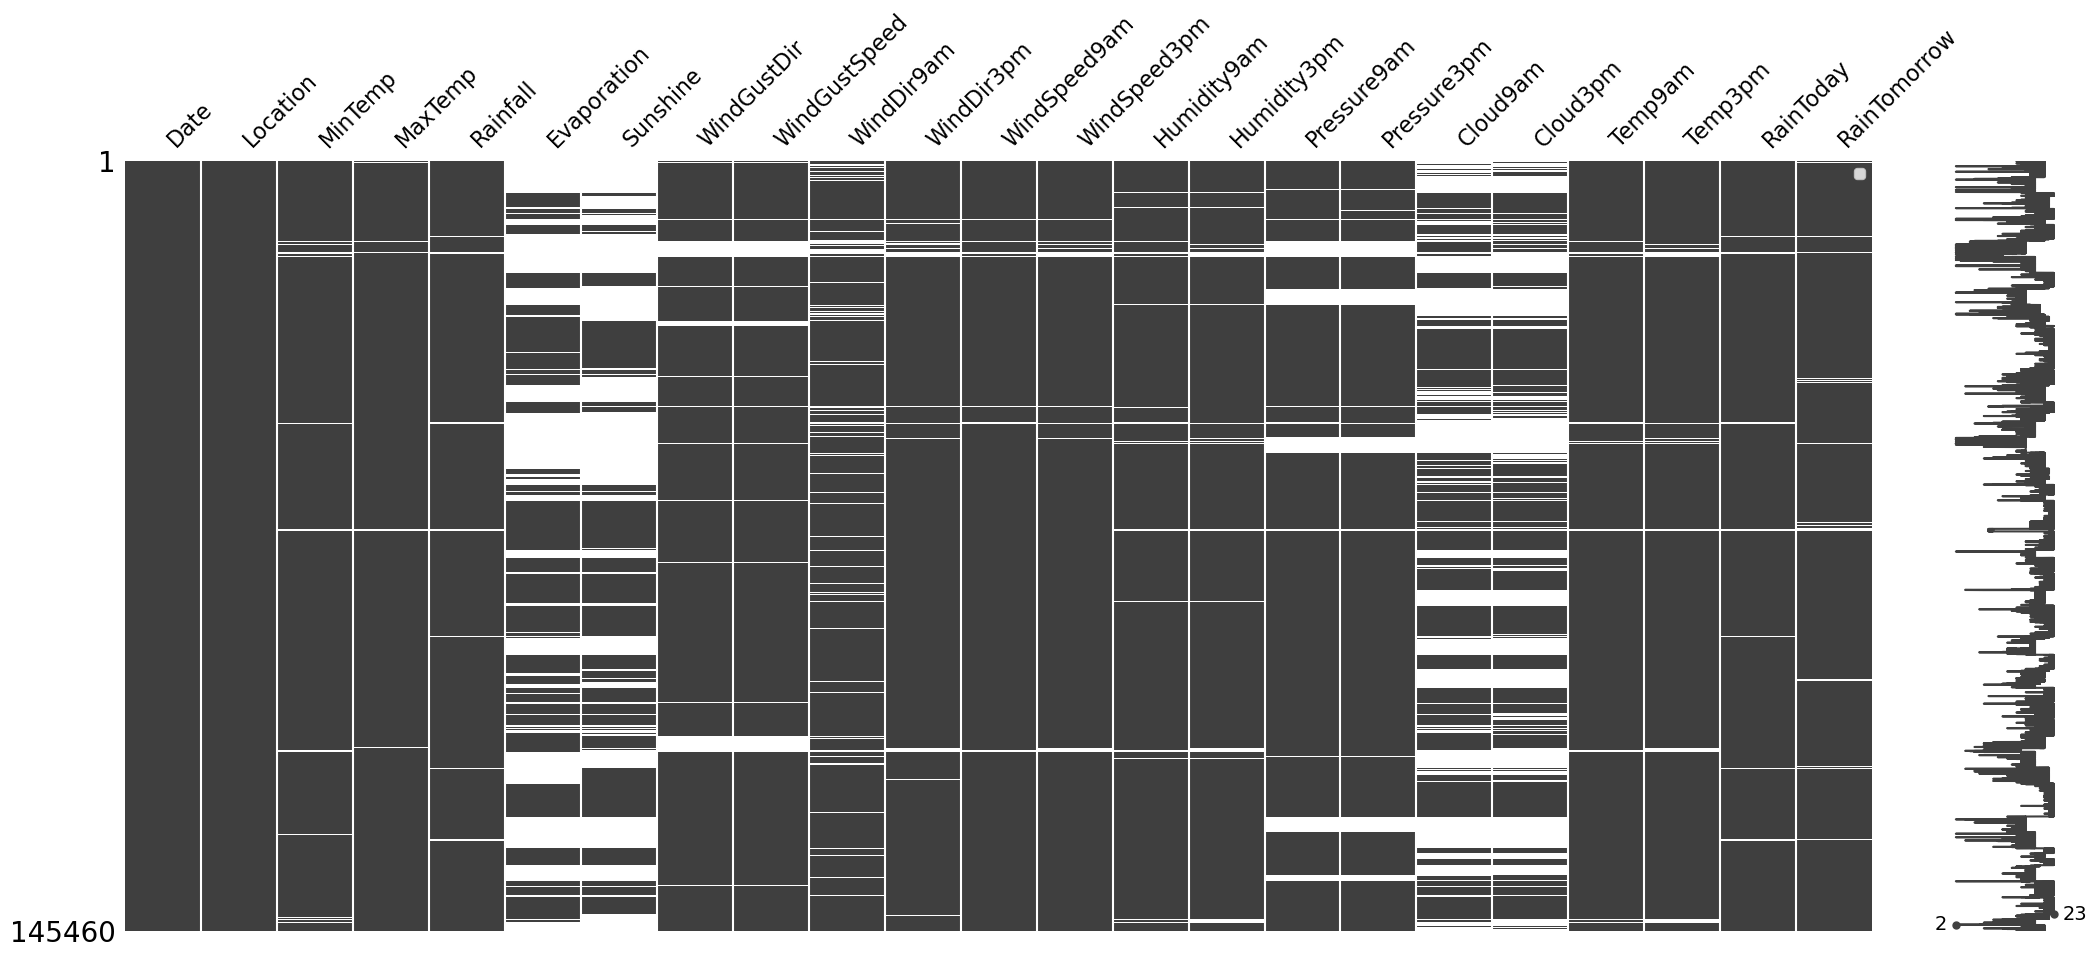

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


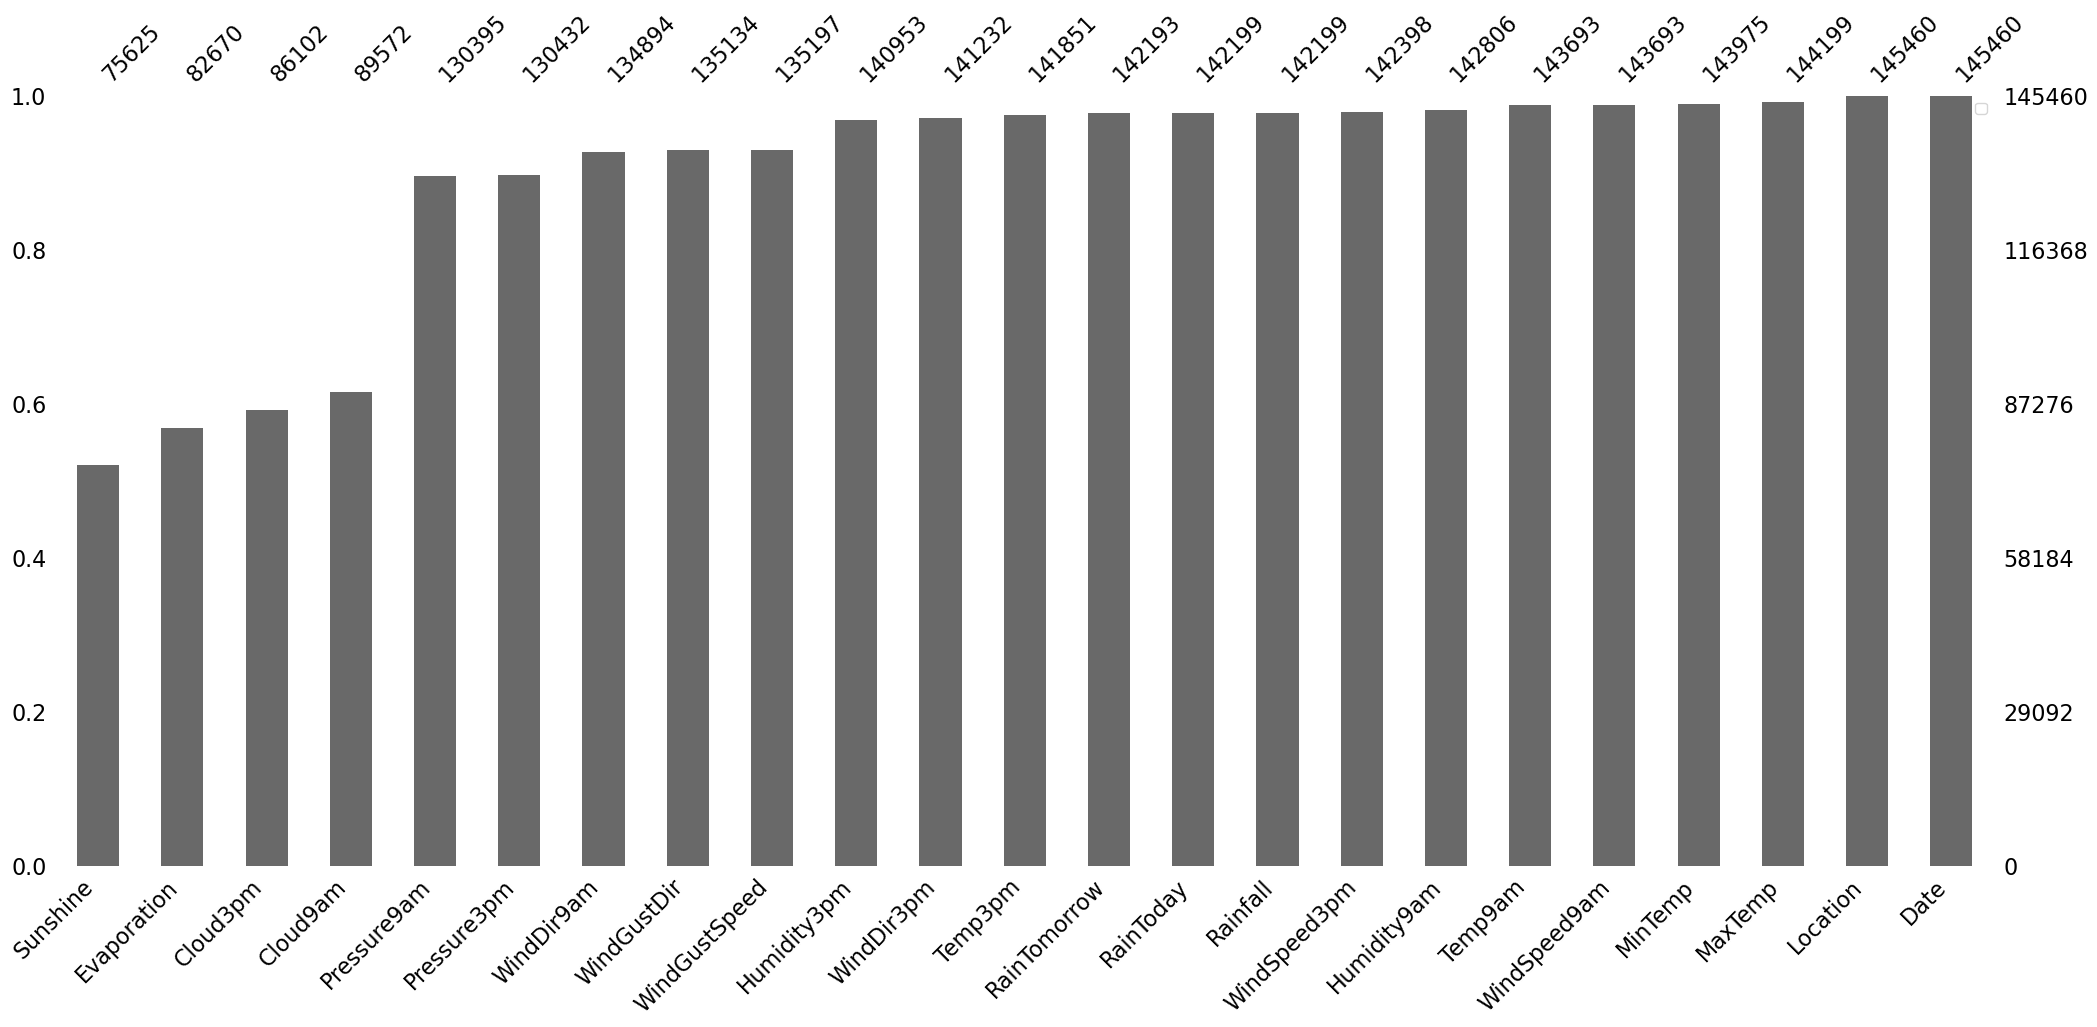

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


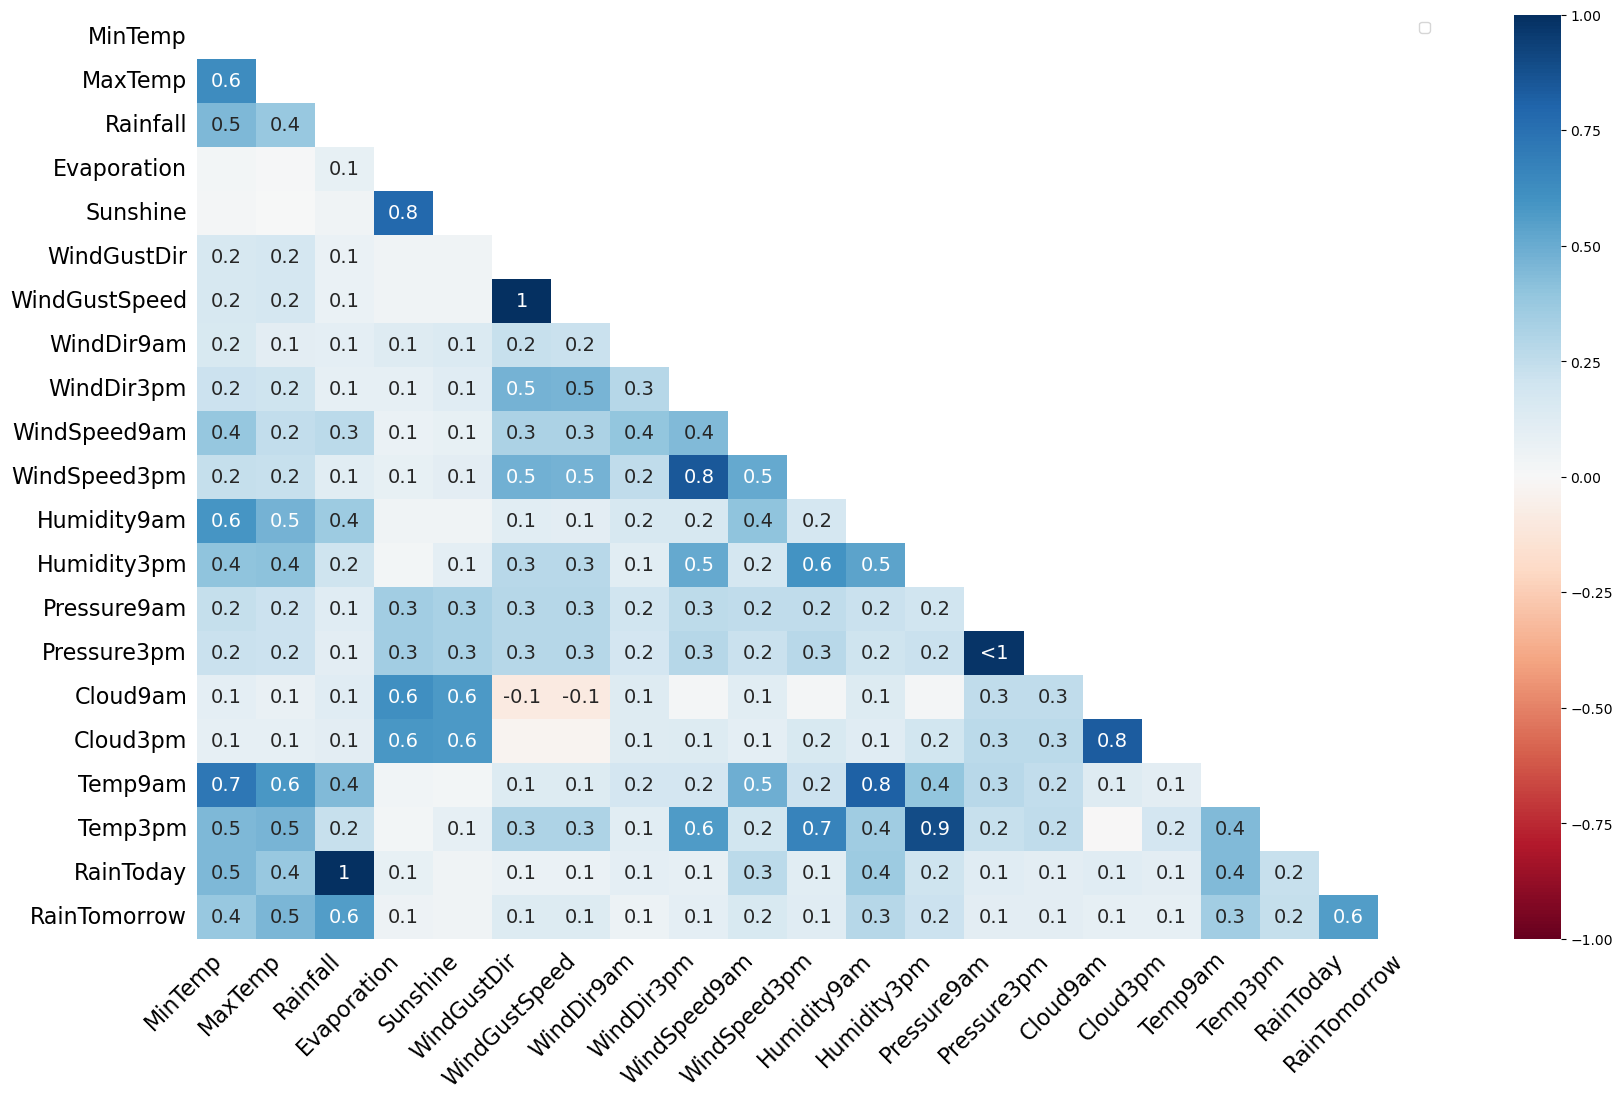

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


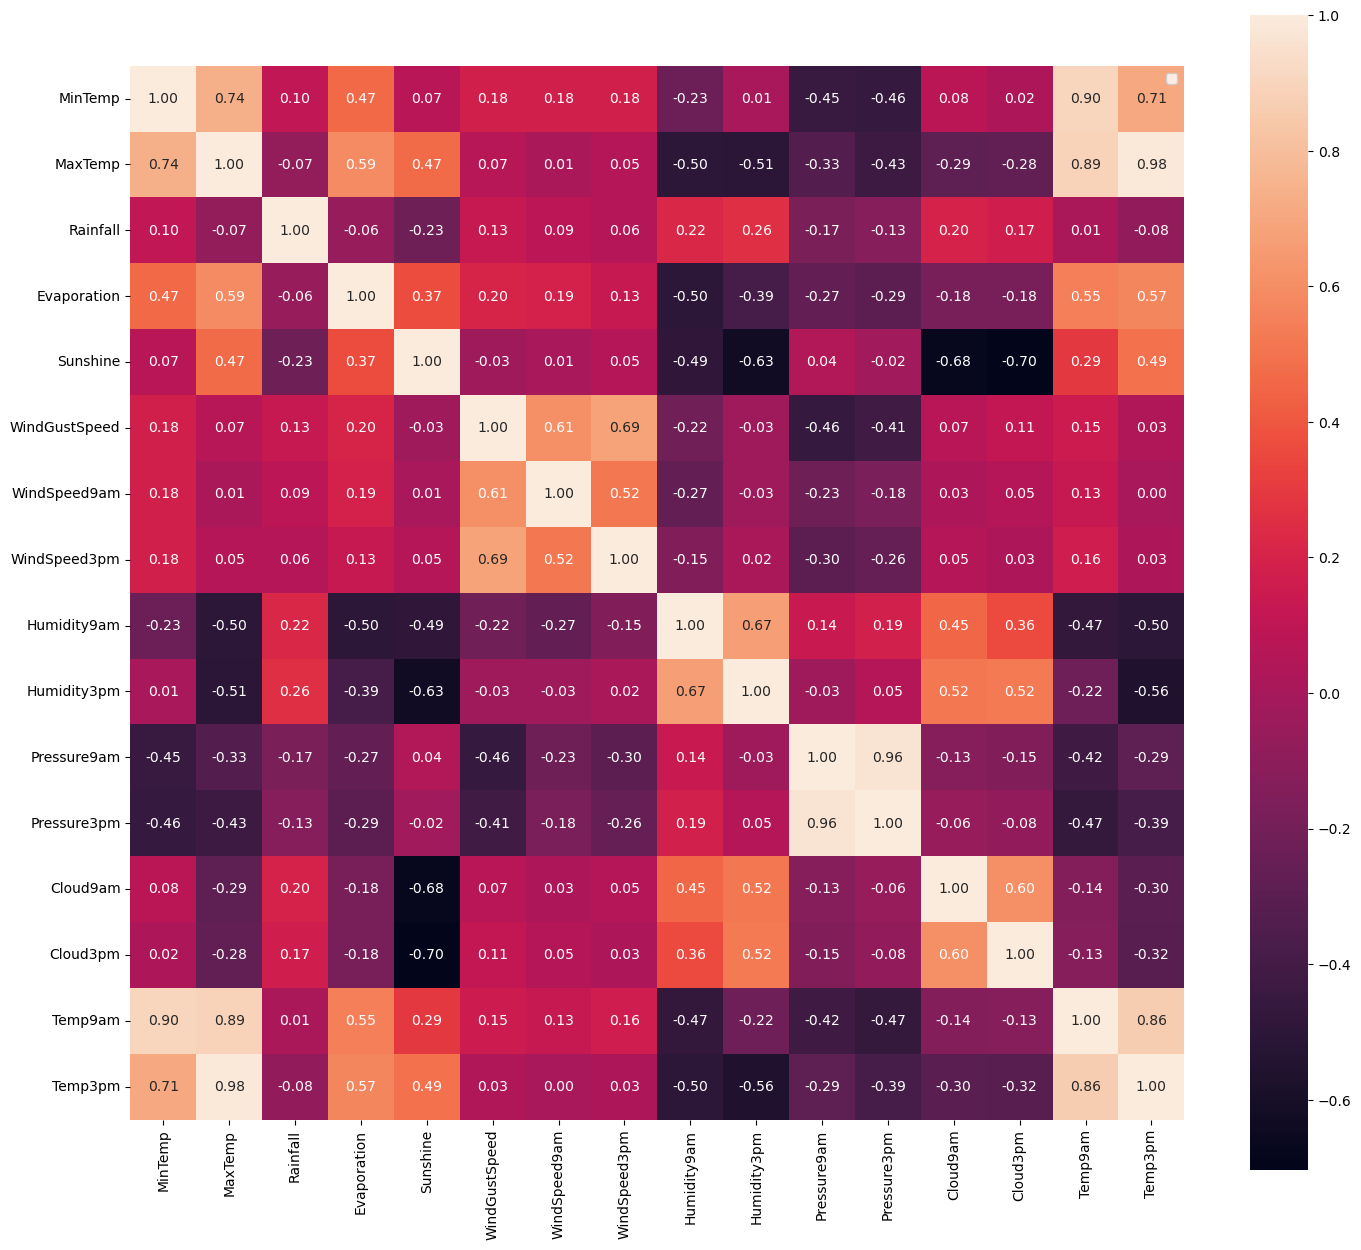

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    0.0
Name: RainToday, Length: 145460, dtype: float64
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    NaN
Name: RainTomorrow, Length: 145460, dtype: float64
0.0    113580
1.0     31880
Name: RainToday, dtype: int64
0.0    113583
1.0     31877
Name: RainTomorrow, dtype: int64


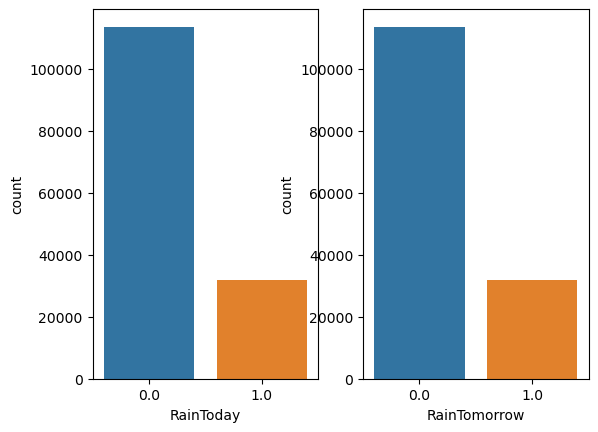

<Figure size 2000x2000 with 0 Axes>

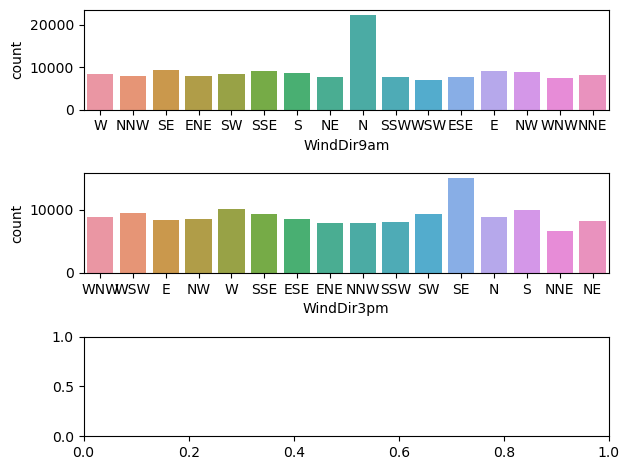

<Figure size 1000x1000 with 0 Axes>

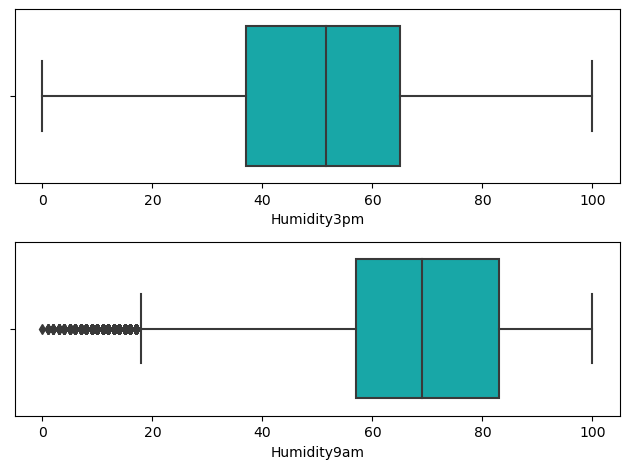

<Figure size 1000x1000 with 0 Axes>

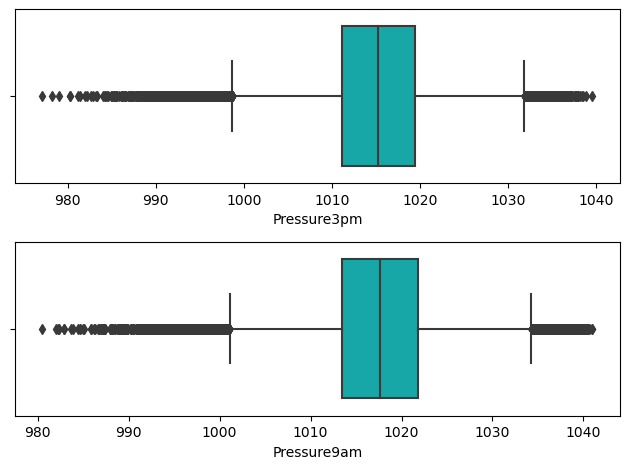

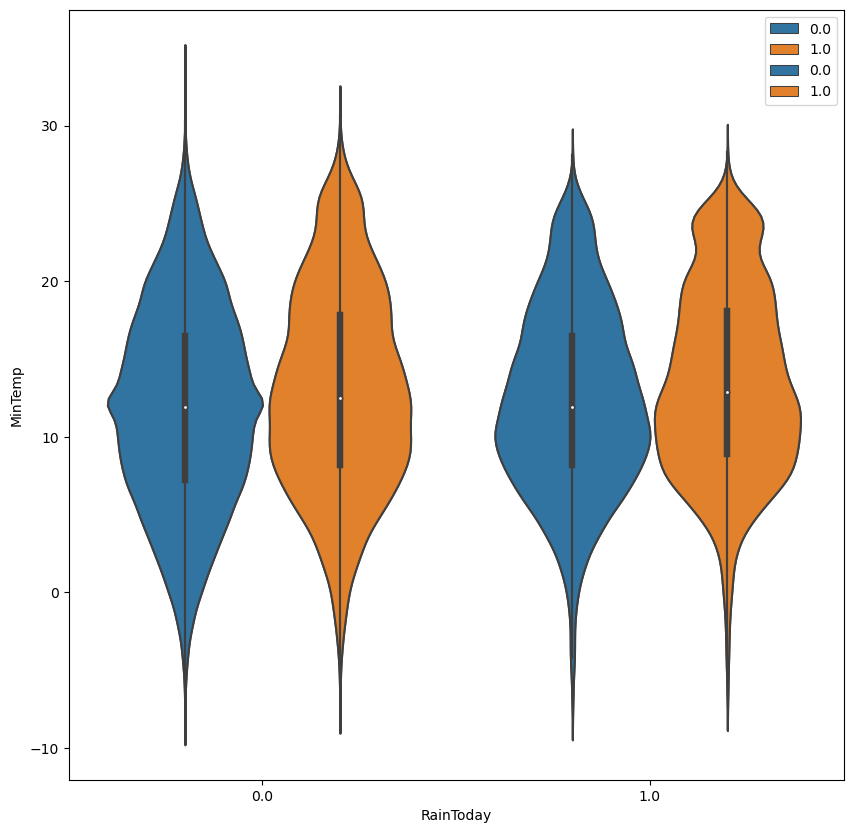

Shape of DataFrame Before Removing Outliers (145460, 22)
Shape of DataFrame After Removing Outliers (136653, 22)
kfoldddd
Counter({1.0: 72265, 0.0: 72265})
kfoldddd1
1 .   accuracy: 0.7676011503589383
Counter({0.0: 72695, 1.0: 72695})
kfoldddd1
2 .   accuracy: 0.7407740774077408
Counter({0.0: 72046, 1.0: 72046})
kfoldddd1
3 .   accuracy: 0.7987310926214573


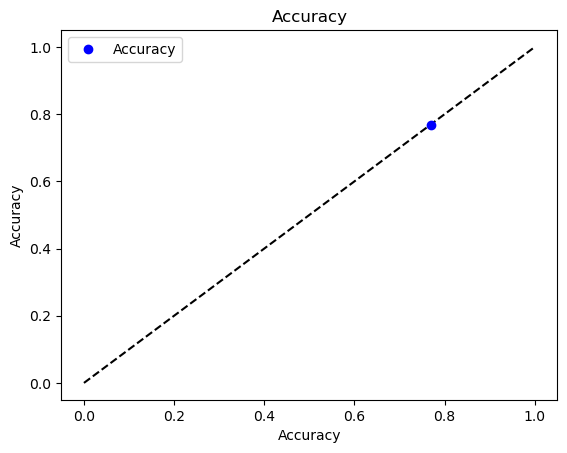

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


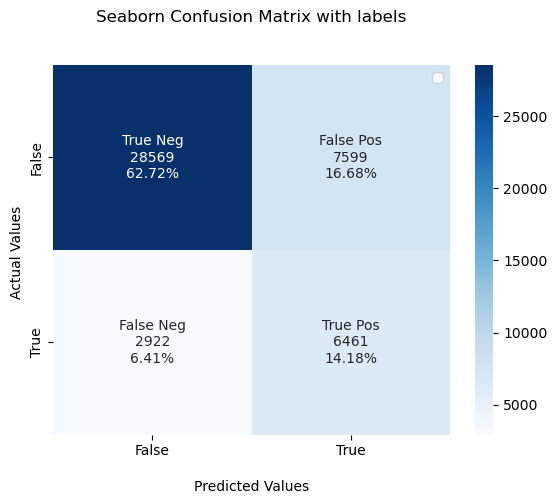

Average accuracy: 0.7690354401293789
kfolddddf
Counter({0.0: 86876, 1.0: 86876})
Holdout score: 
0.7936379003754034


In [ ]:
StartPage()